In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

[ 1  1  1  1  1 10 10 10 10 10  1  1  1  1  1 10 10 10 10 10  1  1  1  1
  1 10 10 10 10 10  1  1  1  1  1 10 10 10 10 10  1  1  1  1  1 10 10 10
 10 10]


Text(0.5, 1.0, 'Array Plot')

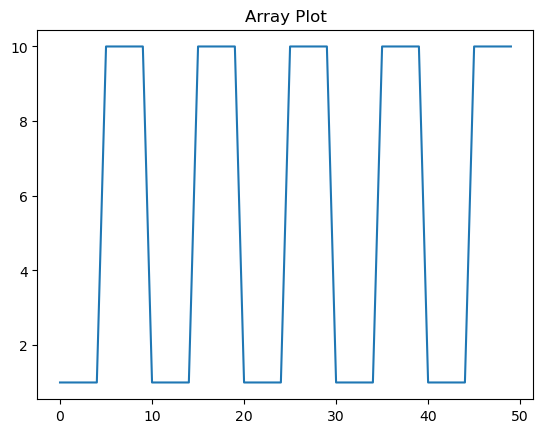

In [ ]:
# this is descrete array befor doing convolution
array = np.array([1 if (i // 5) % 2 == 0 else 10 for i in range(50)])
print(array)
#plot the array
plt.plot(array)
plt.title('Array Plot')


[ 0.1  0.3  0.7  0.9  1.   1.9  3.7  7.3  9.1 10.   9.1  7.3  3.7  1.9
  1.   1.9  3.7  7.3  9.1 10.   9.1  7.3  3.7  1.9  1.   1.9  3.7  7.3
  9.1 10.   9.1  7.3  3.7  1.9  1.   1.9  3.7  7.3  9.1 10.   9.1  7.3
  3.7  1.9  1.   1.9  3.7  7.3  9.1 10.   9.   7.   3.   1. ]


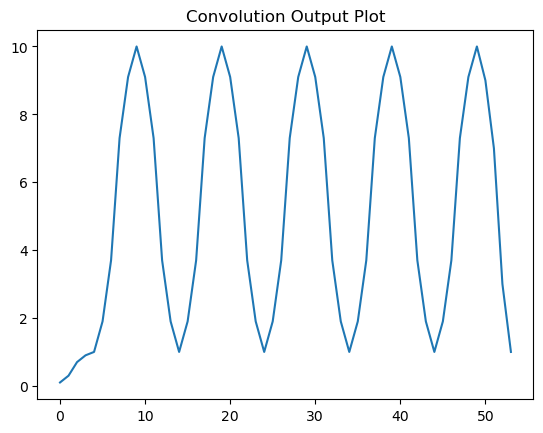

In [ ]:
#then i will make another array to do convolution  that it's summation it's values is 1
kernel = np.array([0.1,0.2,0.4,0.2,0.1])
output = np.convolve(array, kernel)
print(output)
#plot the output
plt.plot(output)
plt.title('Convolution Output Plot')
plt.show()
# in this we added weights into the midle values of the array

Text(0.5, 1.0, 'Original Image')

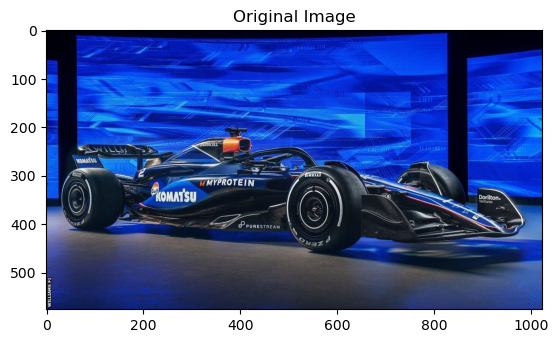

In [16]:
#now we will apply convlution on the image
img = cv2.imread('_132601228_williamsf1.jpg')
#now print the image before convolution as it is in original colors using matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

